# Cardiovascular Disease (CVD) PREDICTOR 


## Data processing and anaylsis

In [33]:
import pandas as pd 
import matplotlib.pyplot
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
import pickle

warnings.filterwarnings('ignore')

df = pd.read_csv("./heart_data.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Features
The features selected to be looked at are: Age, Sex, Max Heart Rate and Exercise Angina (pain)

#  Age and Heart Disease


<Axes: xlabel='Age', ylabel='Count'>

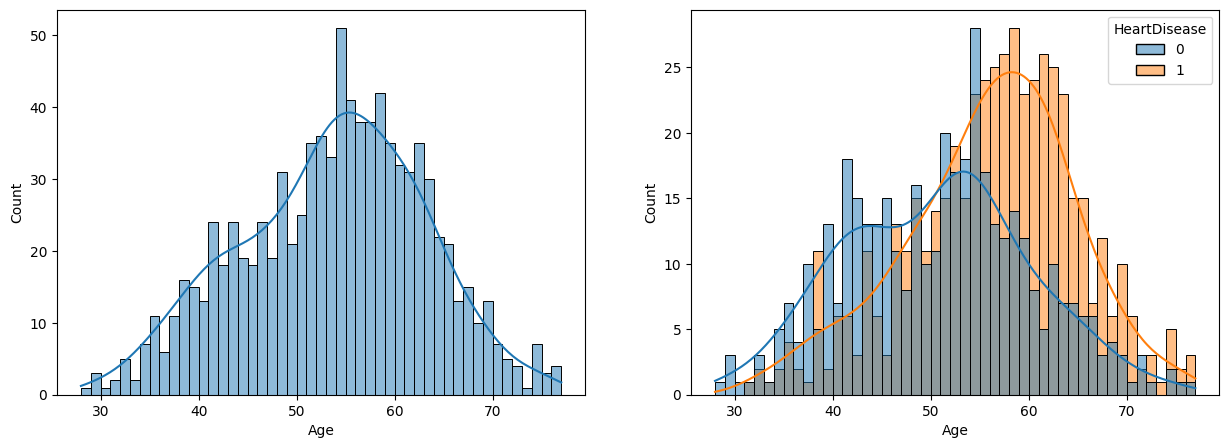

In [35]:


fig, ax = matplotlib.pyplot.subplots(1,2, figsize = (15,5))
sns.histplot(data=df, x="Age", binwidth=1, kde=True,ax=ax[0])
sns.histplot(data=df, x="Age", hue="HeartDisease", binwidth=1, kde=True, ax=ax[1])



#  Sex and Heart Disease

<Axes: xlabel='Sex', ylabel='count'>

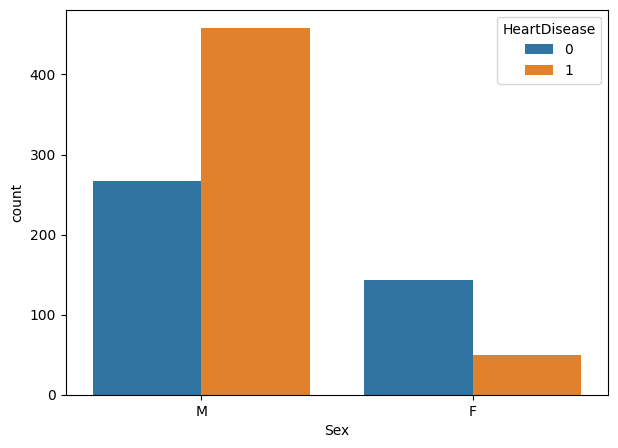

In [36]:


fig, ax = matplotlib.pyplot.subplots(1,1, figsize = (7,5))
sns.countplot(data=df, x="Sex", hue="HeartDisease", ax=ax)

# MaxHR and Heart Disease

<Axes: xlabel='MaxHR', ylabel='Count'>

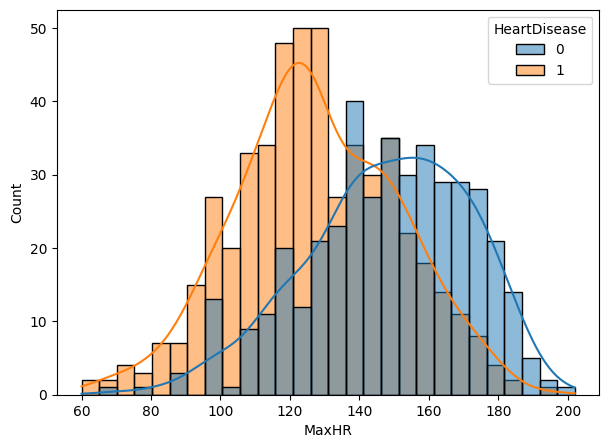

In [37]:
fig, ax = matplotlib.pyplot.subplots(1, 1, figsize=(7,5))
sns.histplot(data=df,x='MaxHR',hue='HeartDisease',binwidth=5, kde=True, ax=ax)

# Exercise Angina (pain) and Heart Disease

<Axes: xlabel='ExerciseAngina', ylabel='count'>

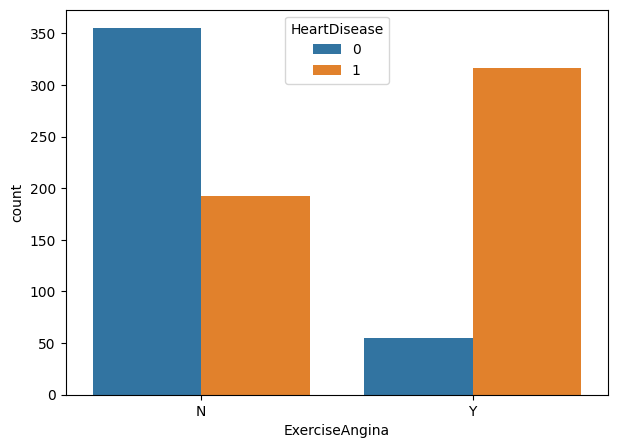

In [38]:
fig, ax = matplotlib.pyplot.subplots(1, 1, figsize=(7,5))
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', ax=ax)

# Model Development

In [39]:
test, train = train_test_split(df, test_size =0.333, random_state=41)
X = df[['Age','MaxHR','Sex','ExerciseAngina']].copy()
y = df[['HeartDisease']].copy()

X_train = train[['Age','MaxHR','Sex','ExerciseAngina']].copy()
y_train = train[['HeartDisease']].copy()

X_test = test[['Age', 'MaxHR', 'Sex', 'ExerciseAngina']].copy()
y_test = test[['HeartDisease']].copy()

min_max_scaler = preprocessing.MinMaxScaler()

# Processing Data
# Replacing M and F to 1 and 0, and Y and N to 1 and 0
X[['Age', 'MaxHR']] = min_max_scaler.fit_transform(X[['Age', 'MaxHR']])
X['Sex'] = (X['Sex'] == 'M').replace({True: 1, False: 0})
X['ExerciseAngina'] = (X['ExerciseAngina'] == 'Y').replace({True: 1, False: 0})

X_train[['Age', 'MaxHR']] = min_max_scaler.fit_transform(X_train[['Age', 'MaxHR']])
X_train['Sex'] = (X_train['Sex'] == 'M').replace({True: 1, False: 0})
X_train['ExerciseAngina'] = (X_train['ExerciseAngina'] == 'Y').replace({True: 1, False: 0})

X_test[['Age', 'MaxHR']] = min_max_scaler.transform(X_test[['Age', 'MaxHR']]) # just transform, don't fit
X_test['Sex'] = (X_test['Sex'] == 'M').replace({True: 1, False: 0})
X_test['ExerciseAngina'] = (X_test['ExerciseAngina'] == 'Y').replace({True: 1, False: 0})


# Model training

lr_classifier = LogisticRegression(solver='liblinear', random_state=41)
lr_classifier.fit(X_train, y_train)

lr_classifier.score(X_test, y_test)




0.7745098039215687

The model achieved a score of 77%

# Analysis

# Confusion Matrix Display
1 here represents heart disease, and 0 represents no heart disease

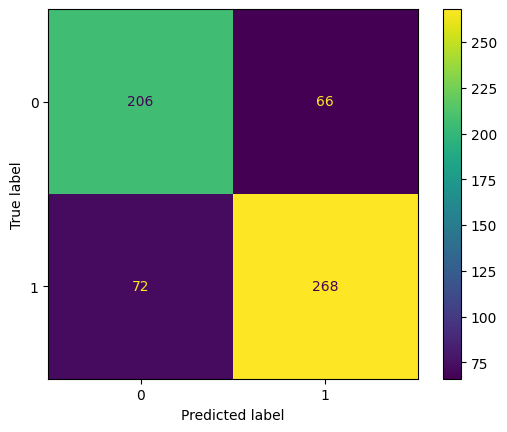

In [40]:
predictions = lr_classifier.predict(X)


ConfusionMatrixDisplay.from_estimator(lr_classifier, X_test, y_test)



# K folds Cross Validation

In [41]:
k_folds = KFold(n_splits = 5, shuffle=True)
# The number of folds determines the test/train split for each iteration. 
# So 5 folds has 5 different mutually exclusive training sets. 
# That's a 1 to 4 (or .20 to .80) testing/training split for each of the 5 iterations.

scores = cross_val_score(lr_classifier, X, y)
# This shows the average score. Print 'scores' to see an array of individual iteration scores.
print("Average Score: ", scores.mean())

Average Score:  0.7527619387027797


# Exporting the Model for Streamlit

In [42]:

pickle.dump(lr_classifier, open("./production.sav", 'wb'))
pickle.dump(min_max_scaler, open("./min_max_scaler.sav", 'wb'))